In [3]:
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

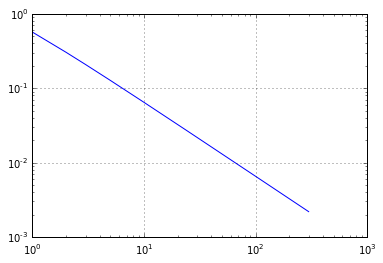

In [8]:
n = np.arange(1, 300, 1)
plt.loglog(n, 1 - np.sqrt(3) * (2*n - 1) / (2*np.sqrt(3)*(n - 1) + 4));

In [54]:
def rk4(x, h, y, f):
    k1 = h * f(x, y)
    k2 = h * f(x + 0.5*h, y + 0.5*k1)
    k3 = h * f(x + 0.5*h, y + 0.5*k2)
    k4 = h * f(x + h, y + k3)
    return x + h, y + (k1 + 2*(k2 + k3) + k4)/6.0

In [168]:
def pN(t, state):
    power = 16
    xy, vxy = state
    f = np.array([[0, 0] for i in xy])
    for i, [x, y] in enumerate(xy):
        f[i][0] += power*(x + 0.5)**-(power-1) - power*(n/sigma - x + 0.5)**-(power-1)
        f[i][1] += power*(y + 0.5)**-(power-1) - power*(((n-1)*np.sqrt(3)/2 + 1)/sigma - y + 0.5)**-(power-1)
        for j, [xj, yj] in enumerate(xy):
            if j >= i:
                break
            ri = np.array(x, y)
            rj = np.array(xj, yj)
            rij = rj - ri
            dij = np.sqrt(np.sum(rij**2))
            if dij <= 0:
                continue
            vij = rij / dij
            fij = power*dij**-(power-1) * vij
            f[j] += fij
            f[i] -= fij
    return np.array([vxy, f])

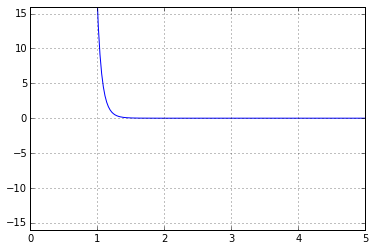

In [240]:
xx = np.linspace(0.01, n/sigma, 200)
power_r = 16
power_a = 0
plt.ylim(-power_r, power_r)
plt.plot(xx, power_r*xx**-(power_r-1));

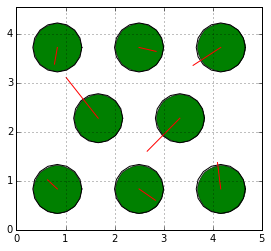

In [226]:
n = 3
sigma = 0.6

x0 = np.linspace(0.5, 0.5 + n - 1, n)
y0 = np.linspace(0.5, 0.5 + (n-1)*np.sqrt(3)/2, n)
xy0 = 1/sigma * np.array([[x + 0.5*(i%2), y] \
                          for x in x0 for i, y in enumerate(y0) \
                          if x + 0.5*(i%2) < n])
vxy0 = np.array([[np.random.normal(), np.random.normal()] for i in xy0])

plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, n / sigma)
plt.ylim(0, ((n-1)*np.sqrt(3)/2 + 1) / sigma)

t = np.linspace(0, 2*np.pi, 17)
xcircle = 0.5 * np.cos(t)
ycircle = 0.5 * np.sin(t)
for [x, y], [vx, vy] in zip(xy0, vxy0/2):
    plt.plot([x], [y], 'go', ms=118*sigma*2/n)
    plt.plot(x + xcircle, y + ycircle, 'k')
    plt.plot([x, x + vx], [y, y + vy], 'r')

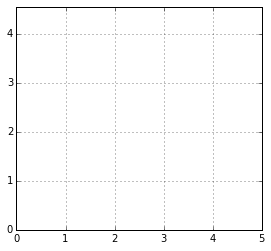

In [231]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, n / sigma), ylim=(0, ((n-1)*np.sqrt(3)/2 + 1) / sigma))
fig.gca().set_aspect('equal', adjustable='box')
line, = ax.plot([], [], 'o', ms=118*sigma)

animframes = 10
maxframes = 500
t = 0
dt = 1e-4
state = np.array([xy0, vxy0])

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(frame):
    global t, dt, state, animframes
    for i in range(animframes):
        t, state = rk4(t, dt, state, pN)
    line.set_data(state[0,:,0], state[0,:,1])
    return line,

In [232]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=maxframes, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('liquid_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:19: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:20: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in add
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in subtract


In [233]:
state

array([[[ -3.22564379e+15,  -3.22564379e+15],
        [  1.01331991e+00,   3.10569102e+00],
        [ -3.22564379e+15,  -3.22564379e+15],
        [ -7.68445241e+14,  -7.68445241e+14],
        [  2.66616243e+00,   1.60330859e+00],
        [ -7.68445241e+14,  -7.68445241e+14],
        [ -3.57620725e+16,  -3.57620725e+16],
        [ -3.57620725e+16,  -3.57620725e+16]],

       [[ -6.45636043e+15,  -6.45636043e+15],
        [ -1.30669352e+00,   1.65796401e+00],
        [ -6.45636043e+15,  -6.45636043e+15],
        [ -1.53722867e+15,  -1.53722867e+15],
        [ -1.33434180e+00,  -1.34680084e+00],
        [ -1.53722867e+15,  -1.53722867e+15],
        [ -7.20960248e+16,  -7.20960248e+16],
        [ -7.20960248e+16,  -7.20960248e+16]]])

In [56]:
def plotf(n, m, r):
    xx = np.linspace(r, 4*r, 200)
    plt.ylim(-(n-m)/2, n - m)
    plt.plot(xx, n*xx**(-n-1), \
             xx,-m*xx**(-m-1), \
             xx, n*xx**(-n-1) - m*xx**(-m-1));

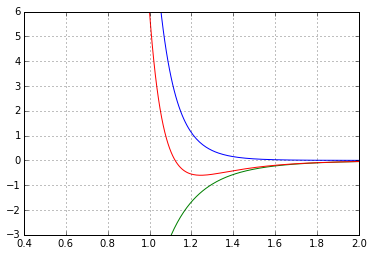

In [72]:
plotf(12, 6, 0.5)

In [54]:
def plotf2(n, m, r, h):
    xx = np.linspace(0, h, 200)
    plt.ylim(-(n-m)/2, n - m)
    plt.plot(xx, \
             n*(xx+r)**(-n-1) - m*(xx+r)**(-m-1) \
             - n*(h-xx+r)**(-n-1) + m*(h-xx+r)**(-m-1));

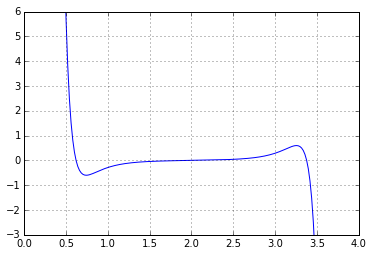

In [55]:
plotf2(12, 6, 0.5, 4)

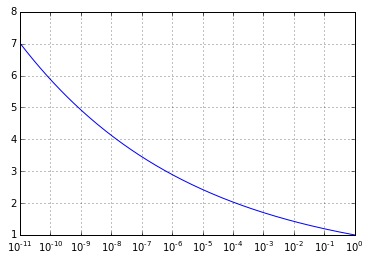

In [88]:
xx = np.logspace(-11, 0, 200)
plt.semilogx(xx, xx**(-1/(12+1)));

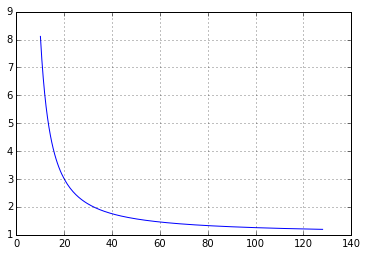

In [96]:
xx = np.linspace(10, 128, 200)
plt.plot(xx, 1e-10**(-1/(xx+1)));